In [1]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

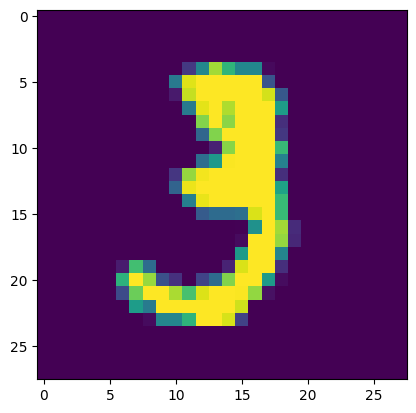

In [5]:
plt.imshow(x_train[10])
plt.show()

In [6]:
y_train[10]

3

In [7]:
# Preprocess input data
train_images = x_train.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = x_test.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [8]:
#Preprocess class labels
train_labels = keras.utils.to_categorical(y_train,10)
test_labels = keras.utils.to_categorical(y_test, 10)

In [10]:
#Define model architecture with Dropout(sequential model)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))


In [15]:
#Define model architecture with Dropout(Functional API)
inputs = keras.Input(shape=(28, 28,1))
x=Conv2D(32, (3, 3), activation='relu')(inputs)
x=MaxPooling2D((2, 2))(x)
x=Conv2D(64, (3, 3), activation='relu')(x)
x=MaxPooling2D((2, 2))(x)
x=Conv2D(64, (3, 3), activation='relu')(x)
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x=Dropout(0.25)(x)
x = Dense(64, activation="relu")(x)
x=Dropout(0.25)(x)
outputs = Dense(10, activation="softmax")(x)
model1 = keras.Model(inputs, outputs)
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928 

In [11]:
# Compile model
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [12]:
#Fit model on training data
model_history=model.fit(train_images, train_labels,
          batch_size=128,
          epochs=10,validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 64s 162ms/step - loss: 0.3373 - accuracy: 0.8937 - val_loss: 0.0876 - val_accuracy: 0.9737
Epoch 2/10
375/375 [==============================] - 54s 144ms/step - loss: 0.0806 - accuracy: 0.9763 - val_loss: 0.0506 - val_accuracy: 0.9852
Epoch 3/10
375/375 [==============================] - 53s 142ms/step - loss: 0.0539 - accuracy: 0.9848 - val_loss: 0.0465 - val_accuracy: 0.9868
Epoch 4/10
375/375 [==============================] - 54s 144ms/step - loss: 0.0396 - accuracy: 0.9883 - val_loss: 0.0461 - val_accuracy: 0.9879
Epoch 5/10
375/375 [==============================] - 54s 143ms/step - loss: 0.0338 - accuracy: 0.9903 - val_loss: 0.0469 - val_accuracy: 0.9872
Epoch 6/10
375/375 [==============================] - 54s 144ms/step - loss: 0.0259 - accuracy: 0.9927 - val_loss: 0.0385 - val_accuracy: 0.9899
Epoch 7/10
375/375 [==============================] - 54s 143ms/step - loss: 0.0223 - accuracy: 0.9938 - val_loss: 0.0420 - val_ac

In [13]:
#Evaluate model on test data
score = model.evaluate(test_images,test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 11ms/step - loss: 0.0322 - accuracy: 0.9930
Test loss: 0.03216525539755821
Test accuracy: 0.9929999709129333


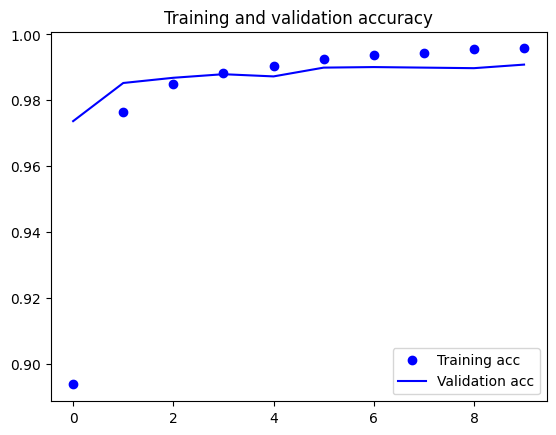

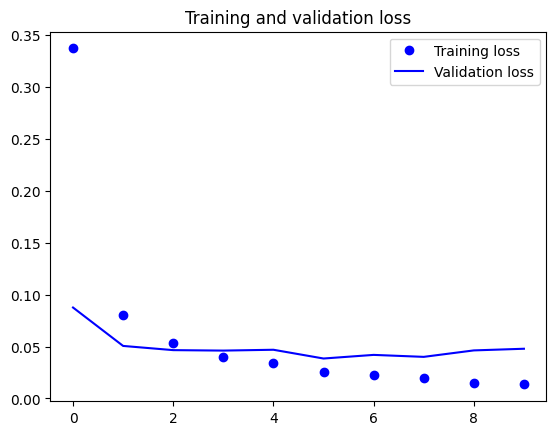

In [14]:
#comparing training and validation accuracy and loss
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()